In [60]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')

from math import log10, floor
import numpy as np

def round_to_2(x):
    return round(x, 1-int(floor(log10(abs(x)))))

# data source: https://www.middleschoolchemistry.com/lessonplans/chapter5/lesson6

df = pd.DataFrame({
    "temp": [0, 20, 40, 60, 80, 100],
    "sugar": [179, 204, 241, 288, 363, 487]
})

C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


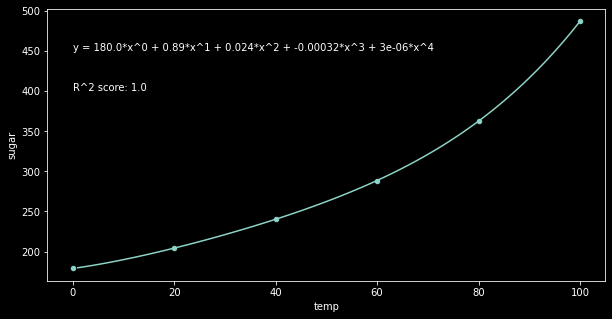

In [59]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

power_max = 4

pipeline = Pipeline([
        ("preprocessing", PolynomialFeatures(power_max)),
        ("model", LinearRegression(fit_intercept=False)),
])
y = df.sugar
X = df.temp.to_frame()

pipeline.fit(X, y)

pipeline.score(X, y)
coef = pipeline['model'].coef_
X_space = np.arange(1,101,1).reshape(-1,1)
y_pred = pipeline.predict(X_space)

score = pipeline.score(X, y)
equation = "y = " + " + ".join([f"{round_to_2(coef[power])}*x^{power}" for power in range(power_max+1)])

fig, ax = plt.subplots(figsize=(10,5))
ax.plot(X_space, y_pred)
df.plot.scatter(x='temp', y='sugar', ax=ax)
plt.text(0, 450, equation)
plt.text(0, 400, f"R^2 score: {round(score, 4)}");

In [66]:
coffee = [200, 80]
milk = [20, 5]

mix = [coffee[0]+milk[0], (coffee[0]*coffee[1] + milk[0]*milk[1])/(coffee[0]+milk[0])]

X_sample_mix = np.array(mix[1]).reshape(-1, 1).T
y_sample_mix = (pipeline.predict(X_sample_mix)*(mix[0]/100)).item()
X_sample_coffee = np.array(coffee[1]).reshape(-1, 1).T
y_sample_coffee = (pipeline.predict(X_sample_coffee)*(coffee[0]/100)).item()

print(f"W {coffee[0]}g kawy ({coffee[1]}°C) rozpuści się {round(y_sample_coffee)}g cukru")
print(f"W {coffee[0]}g kawy ({coffee[1]}°C) zmiesznaej z  {milk[0]}g mleka ({milk[1]}°C) w sumie ({mix[0]}g {round(mix[1])}°C) rozpuści się {round(y_sample_mix)}g cukru")

W 200g kawy (80°C) rozpuści się 725g cukru
W 200g kawy (80°C) zmiesznaej z  20g mleka (5°C) w sumie (220g 73°C) rozpuści się 733g cukru


C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
C:\Users\Mateusz\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
